# Lensing a flat map

In [5]:
using CMBLensing

First we load a simulated unlensed field, $f$, and lensing potential, $\phi$,

In [8]:
@unpack f,ϕ = load_sim_dataset(
    θpix  = 2,       # size of the pixels in arcmin
    Nside = 256,     # number of pixels per side in the map
    T     = Float32, # Float32 or Float64 (former is ~twice as fast)
    use   = :T       # :T for temperature, :P for polarization, or :TP for both
);

We can lense the map with LenseFlow,

In [9]:
f̃ = LenseFlow(ϕ) * f;

And flip between lensed and unlensed maps,

In [23]:
animate([f,f̃], interval=500)

HTML{String}("<video width=\"560\" height=\"400\" controls autoplay loop>\n  <source type=\"video/mp4\" src=\"data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAACiUG1kYXQAAAKuBgX//6rcRem9\n5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTUyIHIyODU0IGU5YTU5MDMgLSBILjI2NC9NUEVHLTQg\nQVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE3IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv\neDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9\nMHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm\nPTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6\nb25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9MTIgbG9v\na2FoZWFkX3RocmVhZHM9MiBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxh\nY2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHly\nYW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3\nZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTIgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVz\naD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBx\ncG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAIxkZYiE\nABT//vfHT8Cm6Plmy51FPSEwitj6SCi/nf+NjjwgAHEqHQ2JG26LpBne3XOIquosR6tGMfUIZuGy\n184pM+riRQpQzbo1LzRAocwQGyhXAkgWf8fQY20CM6LDjml2CATObHpnxaGNDf4y+No1nbzjgVwN\nk8aEFMJObB1fQaoVNszm1yo7kTQ7/il+kCP///eLaGEIs0MWdkrK1oruKCxKP95fxrQQK56/hU3z\nlZFwPUWk/O0MroTlGfy7ynNZI04rN7usCcg7OPsKFG6qbeLOvjParn06o9FA9lkEw0QDmqnexgNW\nDkkB68hSRpgp9M/TNzCjUi/x5ur2dJ/sdKiKy6/ZyQEeIMKUR3cGhP3EmNtPi/XG7gnZy/BKcjkv\n31eDR04uqddgU7LwNGWmJmC9ZN5Fhm5NTWuy/AqivzEXhgzsmBrml1xd8kAE2b6F6b4pWM0Mo+gl\nFxG2N/X2JNupt8AfeYLVChVWu+LyOxsxyr3Na1B+vkVvYPOg4INxK+3eJYtf0sO3qNzgcQ7Dvz9q\nlj832WxOBdBUVxNPqgz6UHA15a6Npv4Owy6pf0rRKFKywrFsP5kB+jvhDtiArAHDmCLIJ7hwkk66\nhoBETdR9+3Vnhqv+Gfzw4xId7IUr44JKWeojtvn3ZcteSy1W30gH+ymSsPSblqcG35M6Ucv+wlBe\nB0+tVVBU1L3pD989Sj50oufGP3pgl7vz/VLewTmMLs22yqwBnSvHllVatGaANPEjbLkiN5YKXKLR\n9oQIBwDu8PCcYdaP/11kAGTLgVGqtCL7Mj+vqi+Om8XSCjwo2oVdr9HcAcFzZ7/ZsRHKwTh0ZQgE\n/SpFv2fCJjt0bS1FYxEoaD04QrtQfDbpp9IShqy3pk2qtZ+eIDB8qlzEyapSLkLR4JGr8Og3LLLs\nTpvQtW3pppaiWh3VRFSA2fFHT5mPd/lBwrQtiNRXhUoTgb2JfgbYpudI82l870PCySpgjQx26Ck3\n9738PWPv4zHrdHl4DedoVHK6eJn8tPKRlJewRw3HSy0qGko2P1YtlHhXlHTelMLXu7A18YAAYy//\nchB5nRoBwvI7D6FgXHHIMdcQlz8WqjQW/yDZl7y+xJJ0m9YxMDKz9dhDnnzPvRnD06nLxaZsFbOL\n7SSVpCZC3FYGP1pP4e6Fayx8qz0BcPWCvP2ITn0Q6nMXrE9hfXVPha973UVdhmcXiva1wzOAqUVQ\nCIOBePMfJaE+PDcN/KnoPoHnsKHZyoShtiZ7dsDccC+koY8vBQ79qYe8vUsC0joCa+o1/kPV1Eop\nz8Noa/rpKsn+ojK2BbaZCNecSNKmv+vzZsbnLPmcNB8J1lCRFdDotJ+6WBeNYg5Qb254QB3pFly+\n9q+IW9vUB8dNZmD187ddBl3uRC17rOIdCGHBJrxW+UNdIIbF5kNp/2fZN8WQsZdQLH3rDoj5T3GG\nw/nspCokdSCfH+X1qWbPw7sbHs9/MPjAH9sOMUthyh2CAMcWvBwzmmjvozjfE6PYwjEhz8kGyPdb\nNFoSY33ej4epzcNxruN3yaR1gKy0M55Fxc9lJdTxxjRfqrSi1OAVOD01KMjgDCN8nxBQ06Tknb2C\nIzfTupnZiajufogaUHTGUTnwgsqbbO5SyItPEF0XgQVlgDgL/VWr2XyeY91gly5xG0aqvy02hU+q\nOZ/XaEyvg3/89nvI6Lz2iqXNjxFSBKicbl4FqOYpBlqQu4CF0RXGp+32GW+hg5KwWDhvgFw2TI1f\nDZ6c33z03bOuLpMLqihFBnssuG1K42m9YCW6ubkO8ExQSW8oZLzqfGUajSVLfPT+xSHbPBtkvUmp\nvrglEM5i9bXxOcHLGb5rEuULYaTcJ2H7meHzuKN0vsf/3vRRNzXP5UwpF0i4HSMgJI+4+FyCTqeS\njO2DGs69YeqZNefAMAqQST1oTb4pvxgLRjbO6Mrst7isWDgp0Fc7EXRw/llhfiZfy3mFjToEwqZW\nau6c3fHdyUcISGqM6cdmAYFeCMtmQnghtBoe3CdKCnpfNqY/8KatYnPG7RMhVSpwodQTUTG5pS41\ntFkSUWp4JlPA9+OOEcxuUDo3gB71YfpOUUo2j+i4JoIOR05+lLK/K3tevQXfHN3ZTD8+I0GUf7iB\nvlsej9uUX4zpXo41IT848T9wGZkOEqBUaTxTyoI5pWlPYPopLWhEYwQcr85GZRfXaNb5r4WuIk9S\nqLusvBoXdnnNmnlrzmlp2a+0L3kWeNiPtXFzOZZ4vfPWMRG5KqJ7Z5SzMgvhV2uejU1Hj8bxzEYO\nnmRsfQfvEETHPCRKgEa+xiIzGdD4ceGr9LwCcabINaxC8pPlPeidfC7c/UL+nQM3OQ1yVCbutOq3\njtrkvfeHZncdTG4BNvlhmoWAW/1K8e0DJ7gJm7q2Y8NLAhJfwooTyo2Yjsnjadj1zefJAgToJYHr\nnLm6+aXMp5r5mONFlpA2Ss/spnjGL/wbv0zDdDLjzCGXh3s6R89/fL9s5m/DHbu5Sk7J5x1fs68h\nGu3SNxV73hle/L9Y++F5uwQLUUECf//snfy72xvUiiKd3x5Xh5zz61pw9uNEXLb8G41YAsGC6O7O\nw49iTqEuuPrjeVUNyW30ZoqL1D/zkwXgN/0hPrY9+UQ/Efa/hrMTm8qv3a/0SJ0WtZZi2FkO80Mm\nIM4wYOkD8ajmD9D5+2IEmIfzQdH0DQBszc5/eiupTxwm/7rhUQNOzQFUP1zqa7m5d0MeIOuXxd+e\ncUmrCcHjgCGhaVtlWpFzZUIJbE9Q8qEyK54Lj5vb6VEnoZ

The difference between lensed and unlensed,

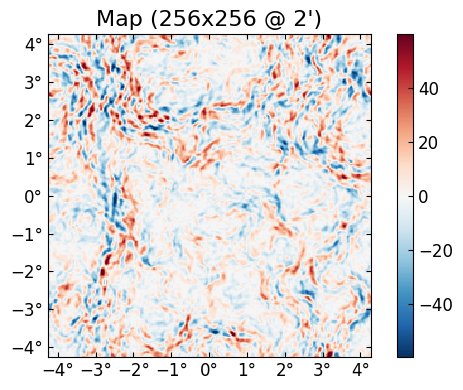

In [11]:
plot(f-f̃);

## Loading your own data

CMBLensing flat-sky `Field` objects like `f` or `ϕ`  are just thin wrappers around arrays. You can get the underlying data arrays for $I(\mathbf{x})$, $Q(\mathbf{x})$, and $U(\mathbf{x})$ with `f.Ix`, `f.Qx`, and `f.Ux` respectively, or the Fourier coefficients, $I(\mathbf{l})$, $Q(\mathbf{l})$, and $U(\mathbf{l})$ with `f.Il`, `f.Ql`, and `f.Ul`,

In [12]:
mapdata = f.Tx

256×256 Array{Float32,2}:
 171.44    167.703    157.405    145.194   …  122.389   147.981   165.684  
 181.742   189.025    185.76     170.233      122.506   153.939   172.667  
 191.916   206.964    208.738    189.901      120.386   152.987   176.192  
 193.143   211.732    214.832    195.211      119.196   150.394   174.092  
 181.553   200.663    202.711    183.772      121.226   150.058   166.004  
 156.305   170.688    172.872    156.56    …  128.578   150.569   152.503  
 122.336   125.968    130.809    127.234      133.438   141.621   131.242  
  77.2644   71.7349    83.5387   102.698      122.771   111.784    94.2574 
  30.3299   21.797     37.6612    74.3351      93.4784   69.2868   49.2435 
  -4.2732   -9.40081    9.87907   53.847       65.2722   36.0297   12.8039 
 -14.2087  -13.463     11.8956    56.6629  …   54.2575   26.643     1.36789
   3.2407    4.63673   29.7466    67.3047      61.7479   42.4608   19.8101 
  32.4864   26.0034    39.9631    65.6554      80.7209   70.57

If you have your own map data in an array you'd like to load into a CMBLensing `Field` object, you can construct it as follows:

In [13]:
FlatS0Map(mapdata, θpix=3)

FlatS0Map{Float32,Flat{3,256,fourier∂}}(Float32[171.44 167.703 … 147.981 165.684; 181.742 189.025 … 153.939 172.667; … ; 164.909 147.386 … 130.645 156.969; 169.192 155.312 … 138.663 161.409])

## Inverse lensing

You can inverse lense a map with the `\` operator (which does `A \ b ≡ inv(A) * b`):

In [14]:
LenseFlow(ϕ) \ f;

Note that this is true inverse lensing, rather than lensing by the negative deflection (which is often called "anti-lensing"). This means that lensing then inverse lensing a map should get us back the original map. Lets check that this is the case:

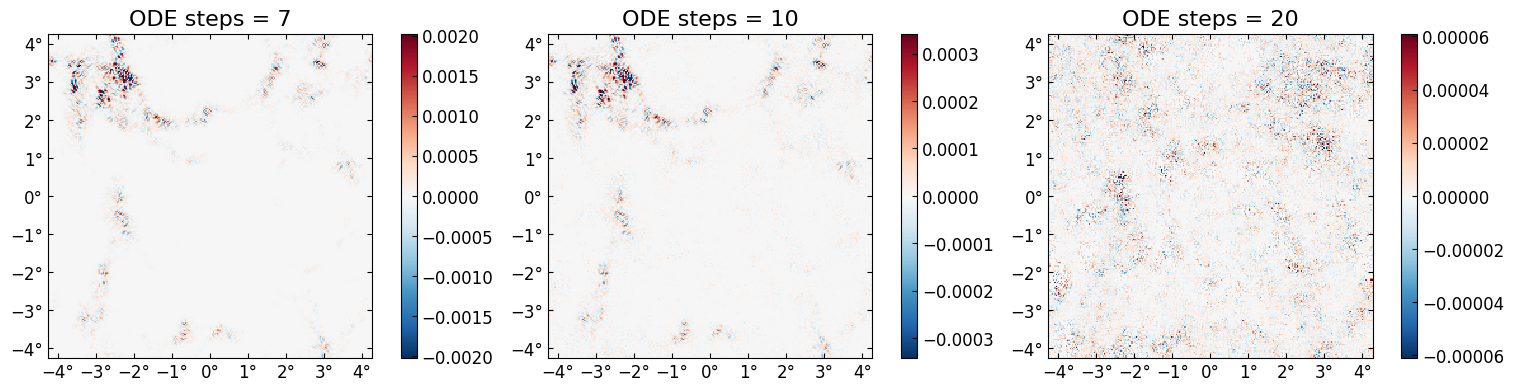

In [15]:
Ns = [7 10 20]
plot([f - (LenseFlow(ϕ,N) \ (LenseFlow(ϕ,N) * f)) for N in Ns],
    title=["ODE steps = $N" for N in Ns]);

A cool feature of LenseFlow is that inverse lensing is trivially done by running the LenseFlow ODE in reverse. Note that as we crank up the number of ODE steps, we recover the original map to higher and higher precision.

## Other lensing algorithms

We can also lense via:
* `PowerLens`: the standard Taylor series expansion to any order:
$$ f(x+\nabla x) \approx f(x) + (\nabla f)(\nabla \phi) + \frac{1}{2} (\nabla \nabla f) (\nabla \phi)^2 + ... $$

* `TayLens` ([Næss&Louis 2013](https://arxiv.org/abs/1307.0719)): like `PowerLens`, but first a nearest-pixel permute step, then a Taylor expansion around the now-smaller residual displacement

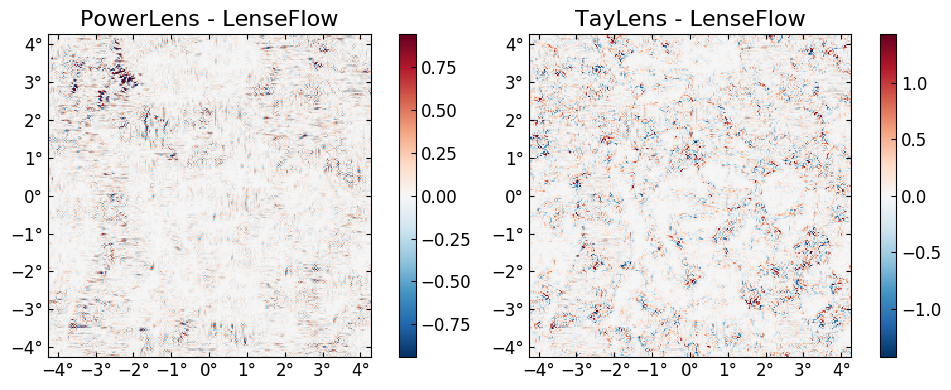

In [16]:
plot([(PowerLens(ϕ,7)*f - f̃) (Taylens(ϕ,2)*f - f̃)], 
    title=["PowerLens - LenseFlow" "TayLens - LenseFlow"]);

## Benchmarking

LenseFlow is highly optimized code since it appears on the inner-most loop of our analysis algorithms. To benchmark LenseFlow, note that there is first a precomputation step, which caches some data in preparation for applying it to a field of a given type. This was done automatically when evaluating `LenseFlow(ϕ) * f` but we can benchmark it separately since in many cases this only needs to be done once for a given $\phi$, e.g. when Wiener filtering at fixed $\phi$,

In [17]:
using BenchmarkTools

In [18]:
@benchmark cache(LenseFlow(ϕ),f)

BenchmarkTools.Trial: 
  memory estimate:  102.36 MiB
  allocs estimate:  2558
  --------------
  minimum time:     29.143 ms (29.80% GC)
  median time:      52.192 ms (61.37% GC)
  mean time:        81.004 ms (74.07% GC)
  maximum time:     151.129 ms (85.91% GC)
  --------------
  samples:          62
  evals/sample:     1

Once cached, it's very fast and memory non-intensive to repeatedly apply the operator:

In [20]:
@benchmark Lϕ * f setup=(Lϕ=cache(LenseFlow(ϕ),f))

BenchmarkTools.Trial: 
  memory estimate:  2.13 MiB
  allocs estimate:  2633
  --------------
  minimum time:     13.870 ms (0.00% GC)
  median time:      15.422 ms (0.00% GC)
  mean time:        21.416 ms (0.00% GC)
  maximum time:     61.834 ms (0.00% GC)
  --------------
  samples:          39
  evals/sample:     1